<a href="https://www.kaggle.com/code/rohitpawar1/1stattempt?scriptVersionId=133419424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-of-exeter-reviews/ExeterReviews.csv
/kaggle/input/university-of-exeter-reviews/reviews.csv


In [93]:
!pip install contractions nltk

In [159]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import contractions
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
df = pd.read_csv("/kaggle/input/university-of-exeter-reviews/reviews.csv")

# ***Data Cleaning***

In [97]:
del df['Unnamed: 0']

In [98]:
del df['index']

In [99]:
df

,Date,text,score,campus,clubs,cs,wifi
0,1st June 23,I like my university very much!,5.0,5,5,5,5
1,31st May 23,"I am from the USA, so I am comparing my experi...",3.4,3,3,3,5
2,20th May 23,Exeter University is generally a lovely place ...,4.0,5,4,4,3
3,20th May 23,Nice facilities and some great lecturers! The ...,4.4,4,4,4,5
4,19th May 23,The uni is good they provide me with alot of s...,4.8,5,5,5,5
...,...,...,...,...,...,...,...
552,25th March 15,Brilliant university; beautiful campus; active...,4.7,5,5,5,5
553,25th March 15,Sport membership is very expensive,4.3,4,5,5,5
554,25th March 15,It is great! But there should be a swimming po...,4.3,4,5,5,5
555,25th March 15,ITS AMAZING! I love my university and wouldn't...,4.7,5,5,5,5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    557 non-null    object 
 1   text    557 non-null    object 
 2   score   557 non-null    float64
 3   campus  557 non-null    int64  
 4   clubs   557 non-null    int64  
 5   cs      557 non-null    int64  
 6   wifi    557 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 30.6+ KB


In [101]:
df.isnull().sum()

Date      0
text      0
score     0
campus    0
clubs     0
cs        0
wifi      0
dtype: int64

In [102]:
df['score'].value_counts(normalize=True)

5.0    0.384201
4.0    0.089767
4.6    0.086176
4.8    0.078995
4.2    0.075404
4.4    0.071813
3.8    0.046679
3.6    0.034111
3.2    0.026930
3.4    0.023339
4.7    0.017953
3.0    0.014363
2.8    0.010772
1.0    0.007181
4.5    0.007181
4.3    0.007181
2.4    0.003591
3.7    0.003591
2.2    0.001795
1.6    0.001795
2.0    0.001795
2.6    0.001795
2.5    0.001795
3.3    0.001795
Name: score, dtype: float64

In [103]:
df['campus'].value_counts()

5    410
4    116
3     22
1      5
2      4
Name: campus, dtype: int64

In [104]:
df['text'][:7]

0                      I like my university very much!
1    I am from the USA, so I am comparing my experi...
2    Exeter University is generally a lovely place ...
3    Nice facilities and some great lecturers! The ...
4    The uni is good they provide me with alot of s...
5    Exeter university has been great! An extremely...
6    Very good location, just a few minutes walk fr...
Name: text, dtype: object

In [105]:
nltk_stopwords = set(stopwords.words("english"))
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

In [106]:
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [107]:
len(combined_stopwords)

378

In [108]:
lemmatizer = WordNetLemmatizer()

In [109]:
def review_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [110]:
cleaned_reviews = []  # list of cleaned tweets
for txt in df['text']:
    cleaned_reviews.append(review_cleaner_without_stopwords(txt))

In [111]:
cleaned_reviews[:5]

['i like my university very much ',
 'i am from the usa so i am comparing my experience to my home uni to my time at exeter my uni in the u had a lot larger campus and the gym rec building wa free for student because it wa part of the tuition the building at my home uni were also a lot more modern and there were more facility there wa a building for blowing glass d printing and other thing for design the forum is not the best my uni had a lot larger library and there wa a lot more space for studying the club society at exeter almost all require money to join and more money each time you want to go to a club event my uni back home allocated money to the different club so many were free the only time you had to pay for club at my home uni wa if you were going on a trip my uni back home doe not have a student union i did not interact with the career service in exeter one thing exeter did better than my home uni wa the internet my home uni had some trouble with internet ',
 'exeter univers

In [112]:
df['cleaned_reviews_wo_sw'] = cleaned_reviews

2839


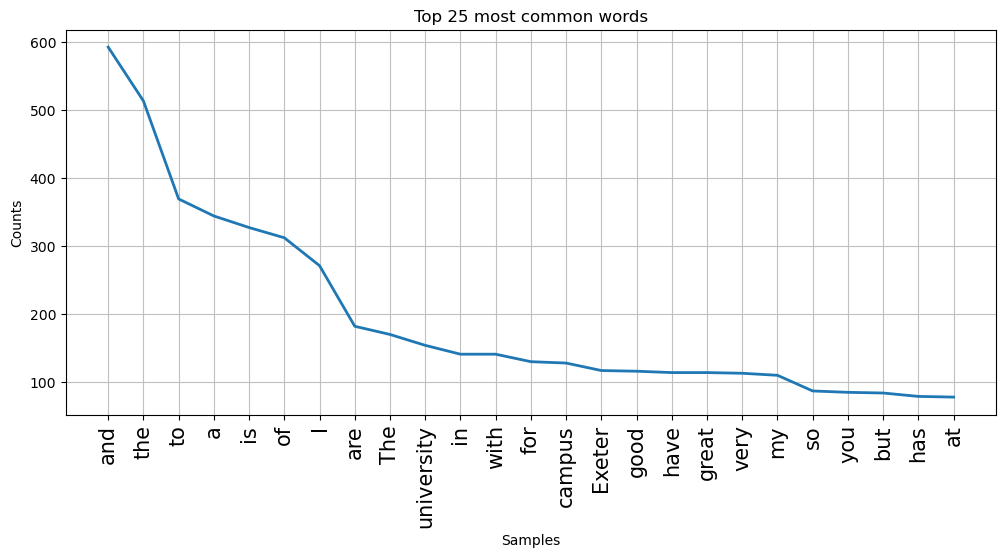

In [113]:
all_words = []
for w in df['text']:
    all_words.extend(w.split())

#print(all_words[:30])
print(len(set(all_words))) #unique words
freqdist = nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freqdist.plot(25, cumulative=False)
plt.show()

1753


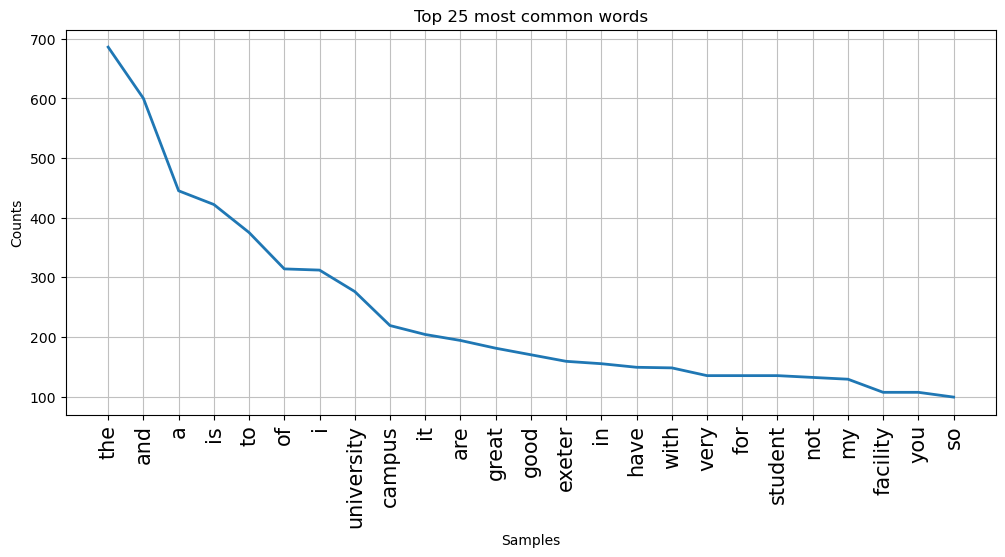

In [114]:
all_words = []
for w in df['cleaned_reviews_wo_sw']:
    all_words.extend(w.split())
    
print(len(set(all_words)))
freqdist = nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freqdist.plot(25, cumulative=False)
plt.show()

# **AFTER APPLYING STOPWORDS**

In [115]:
def review_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [116]:
cleaned_reviews = df['text'].apply(review_cleaner_with_stopwords)
df['cleaned_reviews_with_sw'] = cleaned_reviews
df.head()

,Date,text,score,campus,clubs,cs,wifi,cleaned_reviews_wo_sw,cleaned_reviews_with_sw
0,1st June 23,I like my university very much!,5.0,5,5,5,5,i like my university very much,like university
1,31st May 23,"I am from the USA, so I am comparing my experi...",3.4,3,3,3,5,i am from the usa so i am comparing my experie...,usa comparing experience home uni time exeter ...
2,20th May 23,Exeter University is generally a lovely place ...,4.0,5,4,4,3,exeter university is generally a lovely place ...,exeter university generally lovely place study...
3,20th May 23,Nice facilities and some great lecturers! The ...,4.4,4,4,4,5,nice facility and some great lecturer the mix ...,nice facility great lecturer mix online person...
4,19th May 23,The uni is good they provide me with alot of s...,4.8,5,5,5,5,the uni is good they provide me with alot of s...,uni good provide alot support ultimately wellb...


1517


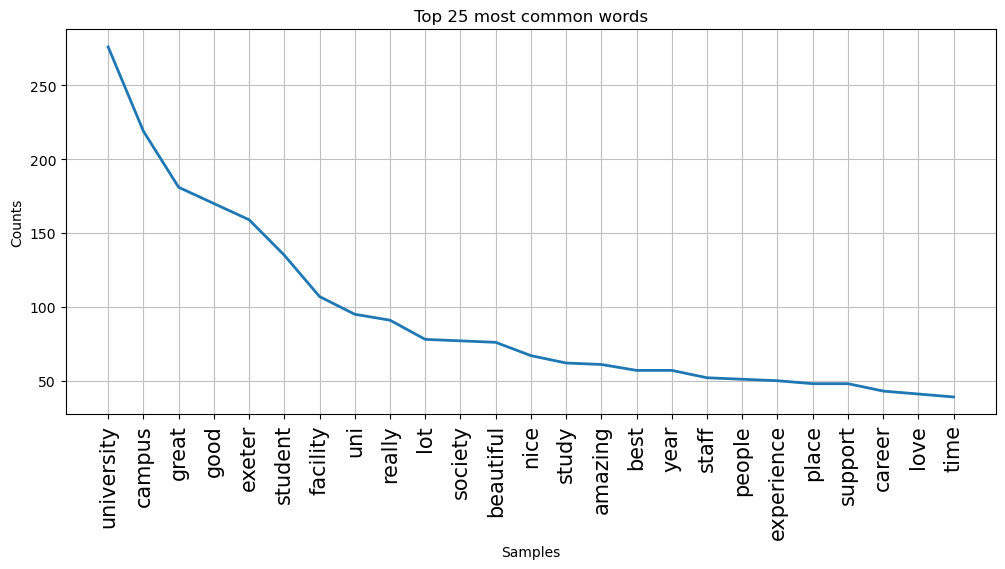

In [117]:
all_words = []
for w in df['cleaned_reviews_with_sw']:
    all_words.extend(w.split())
    
print(len(set(all_words)))
freqdist = nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freqdist.plot(25, cumulative=False)
plt.show()

# **DOMAIN STOPWORDS**

In [124]:
domain_stopwords = ['university', 'student', 'uni']
final_stopwords = domain_stopwords + list(combined_stopwords)

1516


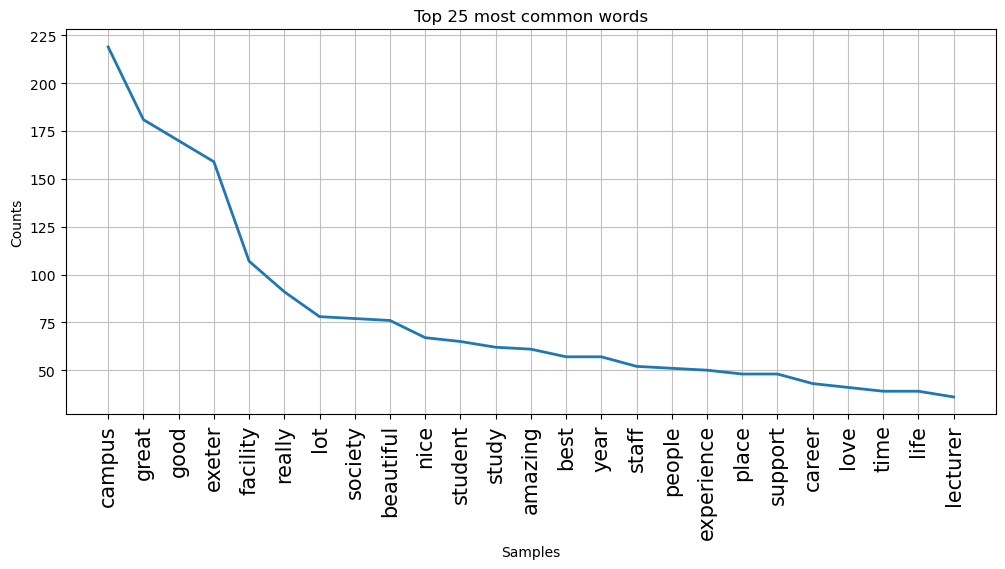

In [125]:
def review_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in final_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

cleaned_reviews = df['text'].apply(review_cleaner_with_stopwords)
df['cleaned_reviews_with_so'] = cleaned_reviews
df.head()

all_words = []
for w in df['cleaned_reviews_with_so']:
    all_words.extend(w.split())
    
print(len(set(all_words)))
freqdist = nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freqdist.plot(25, cumulative=False)
plt.show()



In [127]:
df.head()

,Date,text,score,campus,clubs,cs,wifi,cleaned_reviews_wo_sw,cleaned_reviews_with_sw,cleaned_reviews_with_so
0,1st June 23,I like my university very much!,5.0,5,5,5,5,i like my university very much,like university,like
1,31st May 23,"I am from the USA, so I am comparing my experi...",3.4,3,3,3,5,i am from the usa so i am comparing my experie...,usa comparing experience home uni time exeter ...,usa comparing experience home time exeter lot ...
2,20th May 23,Exeter University is generally a lovely place ...,4.0,5,4,4,3,exeter university is generally a lovely place ...,exeter university generally lovely place study...,exeter generally lovely place study exeter bas...
3,20th May 23,Nice facilities and some great lecturers! The ...,4.4,4,4,4,5,nice facility and some great lecturer the mix ...,nice facility great lecturer mix online person...,nice facility great lecturer mix online person...
4,19th May 23,The uni is good they provide me with alot of s...,4.8,5,5,5,5,the uni is good they provide me with alot of s...,uni good provide alot support ultimately wellb...,good provide alot support ultimately wellbeing...


In [129]:
CV = CountVectorizer()
CV_features = CV.fit_transform(df['cleaned_reviews_wo_sw'])

In [130]:
CV_features.shape

(557, 1739)

In [133]:
CV_features[0]

<1x1739 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [135]:
data = pd.DataFrame(CV_features.todense())
data

,0,1,2,3,4,5,6,7,8,9,...,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
data.size/1e6

0.968623

In [139]:
np.count_nonzero(data)

11105

In [140]:
100 * np.count_nonzero(data) / data.size

1.1464728795413694

In [141]:
CV.get_feature_names_out()[:50]  #vocab words

array(['abd', 'ability', 'able', 'about', 'above', 'abroad', 'absolutely',
       'ac', 'academic', 'academically', 'access', 'accessed',
       'accessible', 'accommodation', 'accoun', 'accounting', 'achieve',
       'achieved', 'acoms', 'acquired', 'across', 'action', 'active',
       'activity', 'actual', 'actually', 'addition', 'additional',
       'addressing', 'adjusting', 'adjustment', 'admit', 'advancement',
       'advice', 'affected', 'affecting', 'after', 'afterall', 'again',
       'against', 'ai', 'aim', 'albeit', 'alec', 'alike', 'alive', 'all',
       'allocated', 'allow', 'allowed'], dtype=object)

In [144]:
len(CV.get_feature_names_out())

1739

In [145]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))

[array(['achieve', 'and', 'any', 'are', 'array', 'best', 'career',
        'development', 'difficulty', 'for', 'health', 'help', 'if', 'it',
        'large', 'learning', 'mental', 'of', 'offer', 'opportunity', 'or',
        'self', 'staff', 'struggle', 'student', 'support', 'supportive',
        'the', 'to', 'university', 'who', 'willing', 'with', 'you', 'your'],
       dtype='<U56')]

# **MODEL BUILDING**

In [160]:
X_train, X_test, y_train, y_test = train_test_split(CV_features,df['score'], test_size=0.25,
                                                    random_state=42)

In [165]:
LR = LinearRegression()
LR.fit(X_train, y_train)


y_pred = LR.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(mse)
r2 = LR.score(X_test, y_test)
print(r2)

#bad model

3.456326908295904
-6.191668540657458
